# Question 1

In [216]:
# Note: although importing pandas and numpy once would be sufficient,
# I have imported it before every question that asked to import it once again
# as per the instructions

# Steps 1, 2, and 3

import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [217]:
# Step 4

mean_age_by_occupation = users.groupby('occupation')['age'].mean()

mean_age_by_occupation

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [218]:
# Step 5

test = users.copy()

test['gender'] = test['gender'].replace('M',1)
test['gender'] = test['gender'].replace('F',0)

male_ratio_by_occupation = test.groupby('occupation')['gender'].sum() / test.shape[0] 

male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending = False)

male_ratio_by_occupation

occupation
student          0.144221
other            0.073171
educator         0.073171
engineer         0.068929
programmer       0.063627
administrator    0.045599
executive        0.030753
scientist        0.029692
technician       0.027572
writer           0.027572
librarian        0.023330
marketing        0.016967
entertainment    0.016967
artist           0.015907
retired          0.013786
lawyer           0.010604
salesman         0.009544
doctor           0.007423
none             0.005302
healthcare       0.005302
homemaker        0.001060
Name: gender, dtype: float64

In [219]:
# Step 6

min_age_by_occupation = users.groupby('occupation')['age'].min()


min_max_age_by_occupation = pd.DataFrame({'Minimum Age': users.groupby('occupation')['age'].min(), 
                                         'Maximum Age':users.groupby('occupation')['age'].max()})
min_max_age_by_occupation

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [220]:
# Step 7

meanAge_by_occupation_and_sex = users.groupby(['occupation','gender'])['age'].mean()
meanAge_by_occupation_and_sex

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [221]:
# Step 8

genderDist_by_occupation = pd.DataFrame({'% Women': (1 - male_ratio_by_occupation)*100,
                                         '% Men': male_ratio_by_occupation*100})
genderDist_by_occupation

,% Women,% Men
occupation,,
student,85.577943,14.422057
other,92.682927,7.317073
educator,92.682927,7.317073
engineer,93.107105,6.892895
programmer,93.637328,6.362672
administrator,95.440085,4.559915
executive,96.924708,3.075292
scientist,97.030753,2.969247
technician,97.242842,2.757158


# Question 2

In [222]:
# Steps 1,2, and 3

import pandas as pd

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')

euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [223]:
# Step 4

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [224]:
# Step 5

num_teams = euro12['Team'].nunique()
num_teams

16

In [225]:
# Step 6

euro12.shape[1]

35

In [227]:
# Steps 7 and 8

discipline = pd.DataFrame(euro12[['Team','Yellow Cards', 'Red Cards']])
discipline.sort_values(['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [113]:
# Step 9

discipline['Yellow Cards'].sum() / num_teams

7.4375

In [114]:
# Step 10 - teams have been filtered based on the given criteria 
# (this is different from 'select' as asked in the next step)

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [128]:
# Step 11 - The question asked to 'select teams' based on criteria 
# so the teams have been selected based on the given criteria

init_G_teams = euro12[euro12['Team'].str[0] == 'G']['Team']

init_G_teams

5    Germany
6     Greece
Name: Team, dtype: object

In [143]:
# Step 12

first_7_cols = euro12[euro12.columns[0:7]]
first_7_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [146]:
# Step 13

allCols_exceptLast3 = euro12[euro12.columns[0:-3]]
allCols_exceptLast3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [165]:
# Step 14 As per the question, presenting only the shooting accuracy for England, Italy, and Russia

Step14_countries = ['England','Italy', 'Russia']
euro12[euro12['Team'].isin(Step14_countries)][['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [229]:
# Step 1

import numpy as np
import pandas as pd

# Step 2 - Part 1 

# The question only asked for a 'number' not 'integer' but it has been assumed to be an integer
# because the question later names the column 'bedrs' and there cannot be 1.2232 bedrooms, for example

# Ultimately, every integer is still a number so the condition is satisfied


array1 = np.random.randint(1,5,size=(100)) # does not generate '5' as one of the integers

series1 = pd.Series(array1).apply(lambda x: int(x))

series1

0     1
1     1
2     3
3     3
4     4
     ..
95    3
96    4
97    1
98    2
99    1
Length: 100, dtype: int64

In [230]:
# Step 2 - Part 2

array2 = np.random.randint(1,4,size=(100)) # does not generate '4' as one of the integers

series2 = pd.Series(array2).apply(lambda x: int(x))
series2

0     3
1     1
2     3
3     1
4     2
     ..
95    1
96    3
97    2
98    2
99    1
Length: 100, dtype: int64

In [231]:
# Step 2 - Part 3

array3 = np.random.randint(10000,30001,size=(100)) # does not generate '30001' as one of the integers

series3 = pd.Series(array3).apply(lambda x: int(x))
series3

0     28489
1     21988
2     26595
3     20239
4     16676
      ...  
95    28732
96    25278
97    21174
98    20365
99    18099
Length: 100, dtype: int64

In [232]:
# Step 3

step3_df = pd.concat([series1,series2,series3],axis=1)

# Step 4

step3_df = step3_df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'})

step3_df

,bedrs,bathrs,price_sqr_meter
0,1,3,28489
1,1,1,21988
2,3,3,26595
3,3,1,20239
4,4,2,16676
...,...,...,...
95,3,1,28732
96,4,3,25278
97,1,2,21174
98,2,2,20365


In [208]:
# Step 5

bigcolumn = pd.concat([series1,series2,series3],axis=0)

# Step 6: Yes, it is true, index has duplicate values

# Step 7

bigcolumn = bigcolumn.reset_index(drop=True)

bigcolumn

0          2
1          2
2          1
3          2
4          3
       ...  
295    26811
296    17421
297    18507
298    10234
299    12636
Length: 300, dtype: int64

# Question 4

In [247]:
# Step 1 

import pandas as pd

# Steps 2 and 3

data = pd.read_csv(r"C:\Users\aashr\Desktop\wind.txt", delim_whitespace=True)

data['datetime'] = pd.to_datetime(data['Yr'].apply(str) + '-' + data['Mo'].apply(str) + '-' + data['Dy'].apply(str))

data = data.drop(['Yr', 'Mo', 'Dy'], axis = 1)

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,datetime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [248]:
# Step 4

date_fix = lambda x: x - pd.DateOffset(years=100) if x > pd.to_datetime('2021-12-15') else x

data['datetime'] = data['datetime'].apply(date_fix)

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,datetime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [249]:
# Step 5 - the type is correct for the index 

data = data.set_index('datetime')
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='datetime', length=6574, freq=None)

In [266]:
# Step 6

data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [285]:
# Step 7 The question asks for total non-missing values, not total non-missing values for each location

total_nonmissing = data.count().sum()
total_nonmissing

78857

In [286]:
# Step 8

data.sum().sum() / total_nonmissing

10.227883764282181

In [297]:
# Step 9

loc_stats = data.dropna().describe().drop(['count','25%','50%','75%'], axis = 0).reindex(['min', 'max', 'mean', 'std'])

loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


In [374]:
# Step 10

day_stats = data.apply(pd.DataFrame.describe, axis = 1).drop(['count','25%','50%','75%'], axis = 1)
day_stats = day_stats[['min', 'max', 'mean', 'std']]

day_stats

,min,max,mean,std
datetime,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [313]:
# Step 11 - this one did not ask for a dataframe, just the results

data[data.index.month == 1].mean() # January = 1

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [321]:
# Step 12

data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
datetime,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [322]:
# Step 13

data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
datetime,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [343]:
# Step 14

data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
datetime,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [363]:
# Step 15

# adjusted for the start date of the first week

# loc is inclusive so end date is 1961-12-31, not 1962-01-01

data_resampleW = data.loc['1961-01-02':].resample('W').mean()

data_resampleW = data_resampleW.apply(pd.DataFrame.describe, axis = 1).drop(['count','25%','50%','75%'], axis = 1).iloc[0:52][['min','max','mean','std']]

data_resampleW

,min,max,mean,std
datetime,,,,
1961-01-08,6.417143,13.541429,9.847659,2.601705
1961-01-15,4.630000,12.468571,8.353214,2.719649
1961-01-22,6.328571,13.204286,9.368413,2.224531
1961-01-29,12.720000,22.530000,16.958095,2.915635
1961-02-05,8.247143,16.827143,11.800357,2.807310
1961-02-12,10.774286,21.832857,15.891548,3.147412
1961-02-19,9.542857,21.167143,13.726825,3.105819
1961-02-26,8.524286,16.304286,12.604286,2.364323
1961-03-05,7.834286,17.842857,11.766766,2.535336


# Question 5

In [148]:
# Step 1 

import pandas as pd

# Steps 2 and 3

chipo = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

In [149]:
# Step 4

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [150]:
# Step 5: 4622 observations
# Step 6: 5 columns
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [151]:
# Step 7

for i in list(chipo.columns):
    print(i)

order_id
quantity
item_name
choice_description
item_price


In [152]:
# Step 8 - A Numerical index starting from 0 and ending at 4622 (4623 rows)

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [153]:
# Step 9 Chicken Bowl is the most ordered item

chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False)

# Step 10 761 is the answer

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [215]:
# Step 11 - Rice is the most ordered item in the choice_description column
# Each row cannot be considered an item since they are lists and the items are inside them

# Cleaned just enough to answer the question as we do not intend to use this particular series

from collections import Counter

abc = dict(Counter(str(list(chipo.choice_description.values)).replace('[','').replace(']','').replace("'",'').split()))

description = pd.Series(abc)
description.sort_values(ascending = False)


Rice,         2403
Cheese,       2281
Salsa,        2064
Beans,        1927
Lettuce,      1741
              ... 
Vegetarian       3
Barbacoa,        2
Brown            2
Carnitas,        1
Lettuce          1
Length: 63, dtype: int64

In [107]:
# Step 12 - 4972 items were ordered: the quantity column describes the quantity
# of the value in item_name. Since the question asked for total of items orederd, this has been summed up

chipo['quantity'].sum()

4972

In [233]:
# Step 13 - 'item_price' turned to float and checked the type in the output

chipo['item_price'] = chipo['item_price'].apply(lambda x: x[1:])
chipo['item_price'] = chipo['item_price'].astype(float)

In [234]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [250]:
# Step 13 (continued) lambda function to change type again, checked the type below

str_lambda = lambda x : str(x)

chipo['item_price'] = chipo['item_price'].apply(str_lambda)

# string is represented by type 'object' in pandas

chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: object

In [148]:
# Step 14 Revenue was 39237.2 

revenue = (chipo['item_price'].astype(float)*chipo['quantity']).sum()
revenue 

39237.02

In [161]:
# Step 16 1834 orders were placed 

ordersPlaced = len(chipo['order_id'].unique())
ordersPlaced

1834

In [162]:
# Step 15 21.39423118865867 is the average revenue per order

avg_revenue = revenue/ordersPlaced
avg_revenue

21.39423118865867

In [169]:
# Step 17 50 different items were sold

number_different_items = len(chipo['item_name'].unique())
number_different_items

50

# Question 6

In [65]:
import pandas as pd
import matplotlib
from matplotlib.pyplot import plot

Q6 = pd.read_csv(r"C:\Users\aashr\Downloads\us-marriages-divorces-1867-2014.csv")

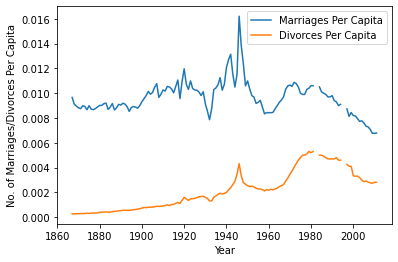

In [138]:
# Since per capita technically refers to per person, the per 1000 columns have not been used
# although they provide similar information

# Missing values in 1995 and 1996

plot(Q6.Year, Q6.Marriages/Q6.Population, label = 'Marriages Per Capita')
plot(Q6.Year, Q6.Divorces/Q6.Population, label = 'Divorces Per Capita')

matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('No. of Marriages/Divorces Per Capita')
matplotlib.pyplot.legend();

# Question 7

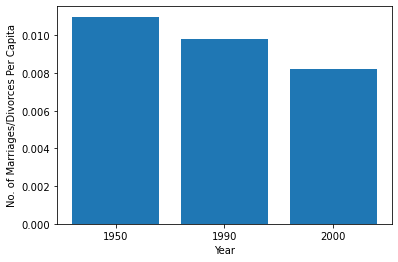

In [139]:
comparison = Q6[Q6.Year.isin([1990,1950,2000])]

matplotlib.pyplot.bar(comparison.Year.astype(str), comparison.Marriages/comparison.Population);

matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('No. of Marriages/Divorces Per Capita');

# Question 8

In [100]:
# The question did not specify ascending or descending so the default has been kept

Q8 = pd.read_csv(r"C:\Users\aashr\Downloads\actor_kill_counts.csv")

Q8 = Q8.sort_values('Count')

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


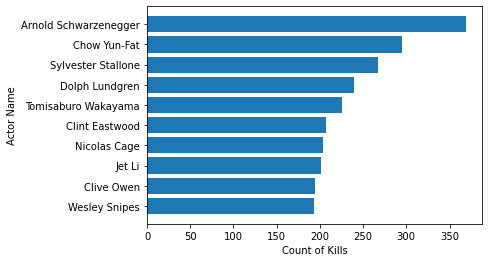

In [140]:
matplotlib.pyplot.barh(Q8.Actor, Q8.Count)
matplotlib.pyplot.xlabel('Count of Kills')
matplotlib.pyplot.ylabel('Actor Name'); # semicolon makes the display neat

# Question 9

In [112]:
# 'Assassinated' does not include 'Possibly assassinated'

Q9 = pd.read_csv(r"C:\Users\aashr\Downloads\roman-emperor-reigns.csv")
Q9

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


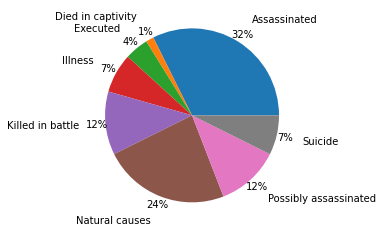

In [134]:
# The chart shows the fraction of roman emporers that were assissinated
# The question does not ask to group all other categories as one so categories have been preserved

Cause = list(Q9.groupby('Cause_of_Death').size().index)
Values = list(Q9.groupby('Cause_of_Death').size().values)

matplotlib.pyplot.pie(Values, labels = Cause, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.3);

# Question 10

In [141]:
Q10 = pd.read_csv(r"C:\Users\aashr\Downloads\arcade-revenue-vs-cs-doctorates.csv")

Q10

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


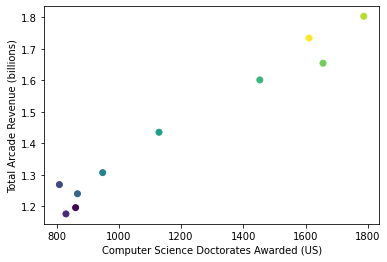

In [245]:
matplotlib.pyplot.scatter(Q10['Computer Science Doctorates Awarded (US)'], 
                          Q10['Total Arcade Revenue (billions)'], 
                          c = Q10['Year'])
matplotlib.pyplot.xlabel('Computer Science Doctorates Awarded (US)')
matplotlib.pyplot.ylabel('Total Arcade Revenue (billions)');